## Date string manipulations with Python

### Introduction

As data professionals, we must be familiar with how to work with date time objects and date strings. Therefore, using Python to cod, convert, manipulate, and group data is essential.  Working with date strings often requires breaking them down into smaller pieces. Breaking date strings into days, months, and years allows you to group and order the other data in different ways so that you can analyze it. Manipulating date and time strings is a foundational skill in EDA. 

I will use a file called eda_manipulate_date_strings_with_python.csv, which 
comes from the bigquery-public-data.noaa_lightning.lightning_strikes public data table. It 
contains cloud-to-ground lightning strike information collected by Vaisala's National Lightning 
Detection Network (NLDN) and aggregated into 0.1° tiles by the National Centers for 
Environmental Information. This means that all the daily strikes within 0.1° latitude x 0.1° 
longitude are summed and assigned to a set of geographic coordinates that represents the 
center of the 0.1° “square” area.  area.

### Objectives

In this project, I will work with 2016–2018 lightning strike data from the National Oceanic and Atmospheric Association (NOAA) to calculate weekly sums of lightning strikes and quarterly lightning strike totals and plot them on bar graphs. Furthermore, I will convert date strings in the NOAA lightning strike dataset into datetime objects and combine these data objects into different groups by segments of time such as quarters and weeks. 

### Import packages and libraries

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
# Read in the data
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\eda_manipulate_date_strings_with_python.csv')
df.head()

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)


In [14]:
# # Data verification - type, features, rows, missing data etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 239.8+ MB


##### Note from the data info, date is a string object which needs to be converted to datetime for easy work with the data

### Create new time columns

In [19]:
# Convert the `date` column to datetime.
df['date'] = pd.to_datetime(df['date'])

# Next, I'll create four new columns: week, month, quarter, and year by using the datetime.strftime() method of the datetime object.
df['week'] = df['date'].dt.strftime('%Y-W%V')
df['month'] = df['date'].dt.strftime('%Y-%m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['date'].dt.strftime('%Y')

df.head(12)

,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2016-08-05,16,POINT(-101.5 24.7),2016-W31,2016-08,2016-Q3,2016
1,2016-08-05,16,POINT(-85 34.3),2016-W31,2016-08,2016-Q3,2016
2,2016-08-05,16,POINT(-89 41.4),2016-W31,2016-08,2016-Q3,2016
3,2016-08-05,16,POINT(-89.8 30.7),2016-W31,2016-08,2016-Q3,2016
4,2016-08-05,16,POINT(-86.2 37.9),2016-W31,2016-08,2016-Q3,2016
5,2016-08-05,16,POINT(-97.8 38.9),2016-W31,2016-08,2016-Q3,2016
6,2016-08-05,16,POINT(-81.9 36),2016-W31,2016-08,2016-Q3,2016
7,2016-08-05,16,POINT(-90.9 36.7),2016-W31,2016-08,2016-Q3,2016
8,2016-08-05,16,POINT(-106.6 26.1),2016-W31,2016-08,2016-Q3,2016
9,2016-08-05,16,POINT(-108 31.6),2016-W31,2016-08,2016-Q3,2016


### Plot the number of weekly lightning strikes in 2018

In [24]:
# Create a new dataframe view of just 2018 data, summed by week.
df_by_week_2018 = df[df['year'] == '2018'].groupby(['week']).sum('numeric_only=True').reset_index()
df_by_week_2018.head()

,week,number_of_strikes
0,2018-W01,34843
1,2018-W02,353425
2,2018-W03,37132
3,2018-W04,412772
4,2018-W05,34972


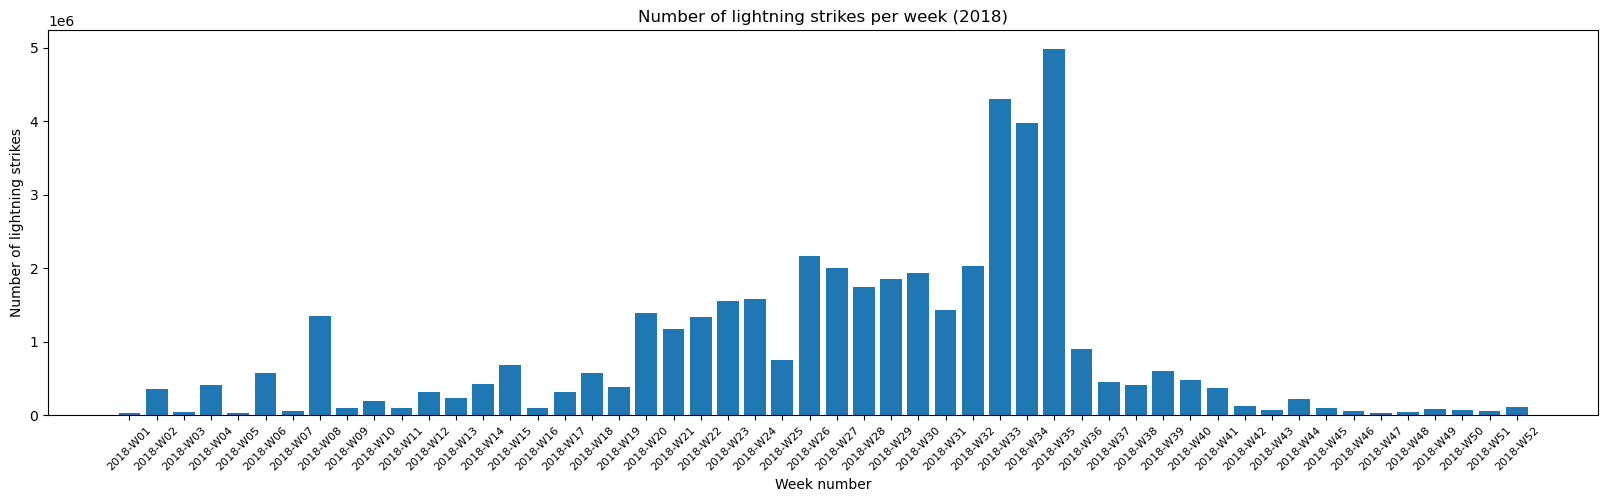

In [26]:
# Plot a bar graph of weekly strike totals in 2018.

plt.figure(figsize = (20, 5))
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)")
plt.xticks(rotation = 45, fontsize = 8)

plt.show()

##### Note: From the plot we can see that Weeks 32, 33 and 34 have the most number of lightning strikes 

### Plot the number of quarterly lightning strikes from 2016–2018

##### Plot lightning strikes by quarter for the full date range of available data. For visualisation, it will be easiest to work with numbers in millions, such as 25.2 million


In [32]:
# Group 2016-2018 data by quarter and sum.
df_by_quarter = df.groupby(['quarter']).sum('numeric_only=True').reset_index()

# Format as text, in millions.
df_by_quarter['number_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(1000000).round(1).astype(str) + 'M'

df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted
0,2016-Q1,2683798,2.7M
1,2016-Q2,15084857,15.1M
2,2016-Q3,21843820,21.8M
3,2016-Q4,1969754,2.0M
4,2017-Q1,2444279,2.4M


### Add labels and plot the bar graph

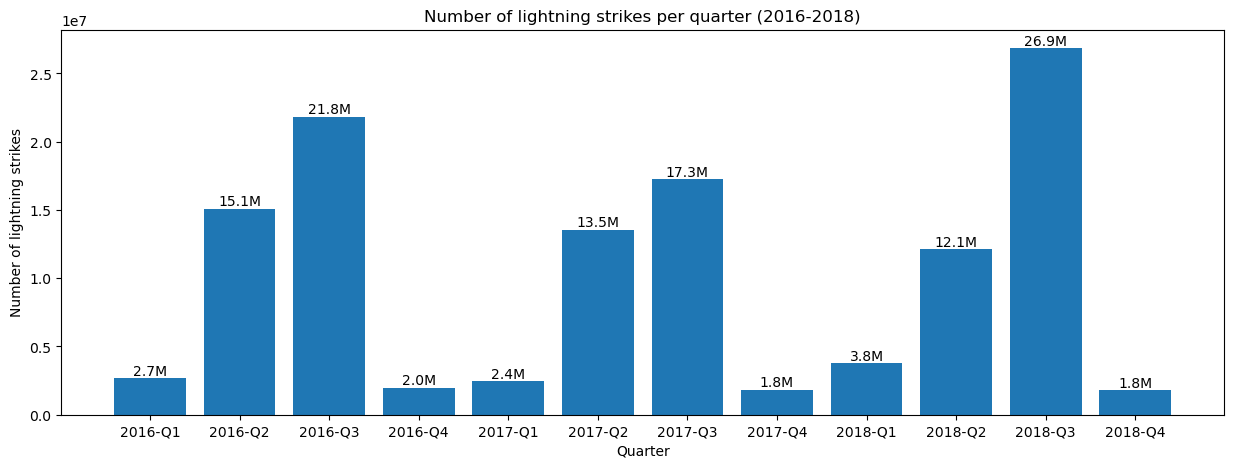

In [36]:
def addlabels(x, y, labels):
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')

plt.figure(figsize = (15, 5))
plt.bar(x = df_by_quarter['quarter'], height = df_by_quarter['number_of_strikes'])
addlabels(df_by_quarter['quarter'], df_by_quarter['number_of_strikes'], df_by_quarter['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes per quarter (2016-2018)')
plt.show()

##### Note: Quarter 3 of each year has the highest number of lightning strikes. Q3 of 2018 saw the highest followed by Q3 of 2016 and then 2017

### Create a grouped bar chart

In [39]:
#  To better compare year-over-year changes in each quarter, we need a group bar chart

# Create two new columns.
df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2:]
df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted,quarter_number,year
0,2016-Q1,2683798,2.7M,Q1,2016
1,2016-Q2,15084857,15.1M,Q2,2016
2,2016-Q3,21843820,21.8M,Q3,2016
3,2016-Q4,1969754,2.0M,Q4,2016
4,2017-Q1,2444279,2.4M,Q1,2017


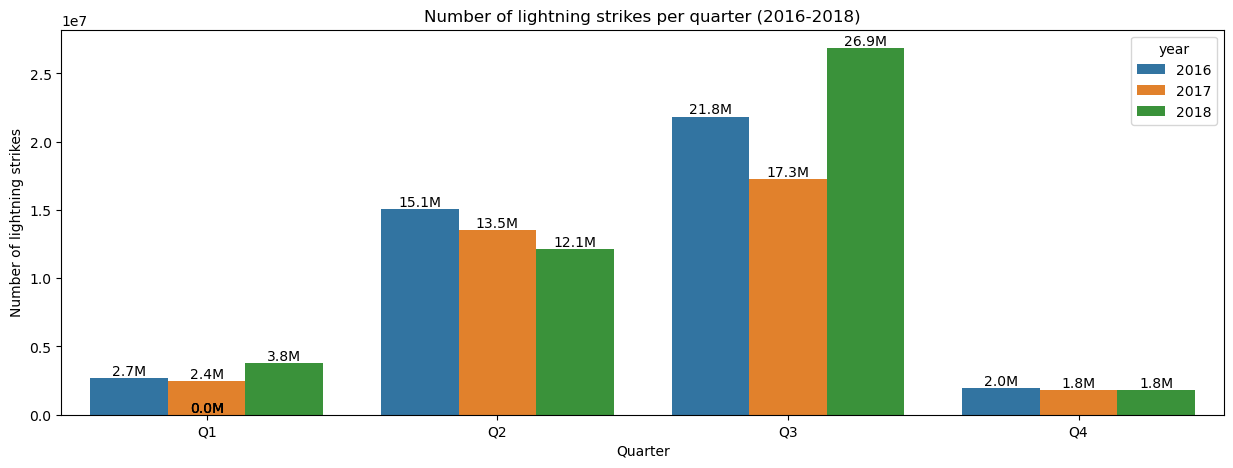

In [41]:
plt.figure(figsize = (15, 5))
p = sns.barplot(
    data = df_by_quarter,
    x = 'quarter_number',
    y = 'number_of_strikes',
    hue = 'year')
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000000, 1))+'M', 
                   (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2016-2018)")
plt.show()